# **Assignment**

Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:

Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

Assume the following:

There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).
Channel mix, targeting, and efficiency are outside the scope of this exercise.
There may be data provided that is not useful in your end presentation

# **Exploratory Data Analysis**

The provided data is in CSV format, and we can use the Pandas library to load and analyze it. Since the data is given in three files, our first step would be to merge them into one set (i.e., a Pandas DataFrame) for easier analysis and manipulation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
freedom_client = pd.read_csv('/content/drive/MyDrive/freedom_client_data.csv')
freedom_client


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85
...,...,...,...,...
46342,79128447873656,Midwest,Own,80
46343,775282584574774,West,Own,80
46344,672851043076186,South,Own,80
46345,908709611392336,South,Rent,80


In [ ]:
freedom_deposit = pd.read_csv('/content/drive/MyDrive/freedom_deposit_data.csv')
freedom_deposit

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23
...,...,...,...,...,...
480389,190383139908095,Scheduled Deposit,188.0,Biweekly,2019-10-06
480390,346629564742837,Scheduled Deposit,195.0,Biweekly,2019-10-06
480391,346629564742837,Actual Deposit,195.0,Biweekly,2019-10-06
480392,230118692632315,Scheduled Deposit,157.0,Biweekly,2019-10-06


In [ ]:
freedom_calendar = pd.read_csv('/content/drive/MyDrive/freedom_calendar_data.csv')
freedom_calendar

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1
...,...,...
148,2019-10-27,Month 5
149,2019-10-28,Month 5
150,2019-10-29,Month 5
151,2019-10-30,Month 5


We will execute the merging in two steps:

1. Merge the client and the deposit data frames on the client ID column

2. Merge the resulting data frame from Step 1. with the calendar data set on the deposit / Gregorian date

Notice how the arguments' names change in the two merge steps. In the first step, the column that we want to merge on (or join in SQL terminology) is named the same in both data frames, so we only need to specify the on argument. In the second step, the merging column has different names, in the previously merged data frame it is called deposit_date and in the calendar DataFrame, it is named gregorian_date. To tell Pandas to use the desired columns, we need to specify the left_on and right_on arguments, were "left" is the DataFrame that calls the merge() method and "right" is the one that is being merged, i.e., the one provided as an argument. For extra info, we would suggest that you go through the documentation of the method.

In [ ]:
# merging clients and deposits on client ID
merge_client = freedom_client.merge(freedom_deposit, on="client_id")
merge_client

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01
...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06


In [ ]:
# merging the calendar data on the date
merge_calendar = merge_client.merge(freedom_calendar, left_on="deposit_date", right_on="gregorian_date", copy=False)
merge_calendar

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,2019-10-06,Month 5


The resulting data frame looks OK, though we have the date column twice; once as gregorian date and second time as a deposit date. This is because the merging works by column names: columns with same values but different names are treated as different. We can easily solve it by dropping / deleting any one of the duplicated columns; let it be the Gregorian date.

In [ ]:
df = merge_calendar
df.drop(columns="gregorian_date", inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4
...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5


Let us start exploring this data set. We can dive deeper into the properties of each column. The clients' geographical region and residence status are categorical variables, and the age is a number.

Usually, for the categorical variables, we can use Pandas' value_counts() method to get a list of the column's unique values, alongside a corresponding count.

For the numerical column, we can call the describe() method to get box-plot statistics, like the min, max value, and the 25th, 50th, and 75th percentiles. We can also plot it as a histogram, to get an overview of its distribution.

In [ ]:
# there are four regions
df["client_geographical_region"].value_counts()

,count
client_geographical_region,
West,205629
South,108004
Midwest,88185
Northeast,78576


In [ ]:
# two types of residence status
df["client_residence_status"].value_counts()

,count
client_residence_status,
Own,345432
Rent,134962


In [ ]:
# the youngest client is 21 yrs, while the eldest is 105!
df["client_age"].describe()

,client_age
count,480394.000000
mean,52.192469
std,13.773928
min,21.000000
25%,41.000000
50%,52.000000
75%,62.000000
max,105.000000


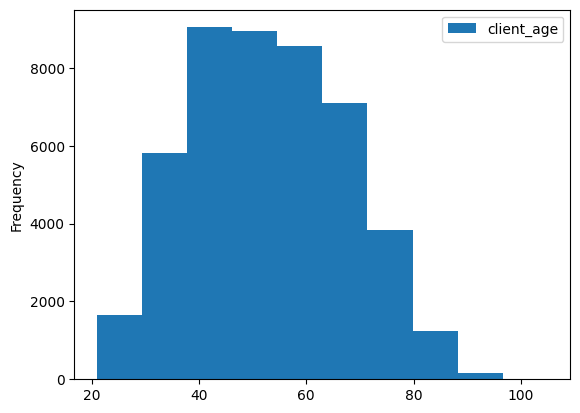

In [ ]:
# most of the customers are between 40-60 years
_ = freedom_client[["client_age"]].plot(kind="hist")

As mentioned, we have five months' worth of data. Months 1 and 4 have 30 days each, the rest have 31 days.

In [ ]:
freedom_calendar["month_name"].value_counts()

,count
month_name,
Month 2,31
Month 5,31
Month 3,31
Month 1,30
Month 4,30


The data spans from June 01, 2019, up to the last day of October 2019.

In [ ]:
df["deposit_date"].min(), df["deposit_date"].max()

('2019-06-01', '2019-10-31')

The type and cadence of the deposits are also categorical variables, so we would most likely be doing some groupings or plots around them. Let's start by first exploring their values.

In [ ]:
df["deposit_type"].value_counts()

,count
deposit_type,
Scheduled Deposit,247986
Actual Deposit,232408


In [ ]:
# three types of cadence (or tempo) of deposits: monthly, biweekly, and extra
df["deposit_cadence"].value_counts()

,count
deposit_cadence,
Monthly,262858
Biweekly,209189
Extra,8347


We now turn our attention to the deposit amount. The plot below plots the sum of all the deposits grouped by the month.

The type of the date column is currently a string (you can verify that by running type(df["deposit_date"].values[0]). For easier manipulation, we would like to convert it into a proper date object. Luckily, Pandas provides us with the pd.to_datetime() method that allows us to do that.

In [ ]:
# convert the date column type to a datetime object
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

We can use the Matplotlib library and its many customizable methods to build our plot. The next cell imports the library's pyplot module and modifies some of its parameters: the figure and the font size. These values should improve the readability of our plots.

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


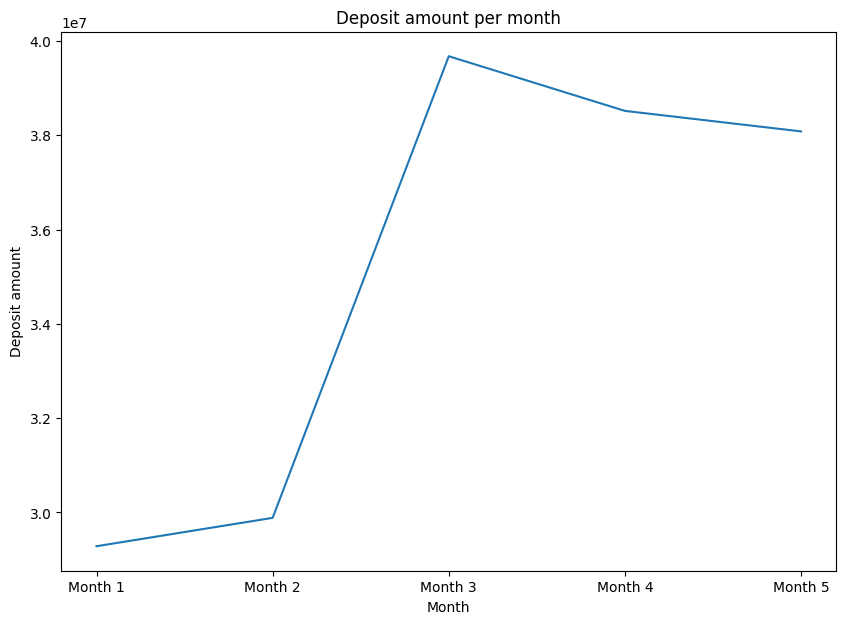

In [ ]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()
print(deposit_amount_by_month)

# plots the line
_ = plt.plot(deposit_amount_by_month)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

Let's see what the plot looks like if we replace the amount with the number of deposits. The plot looks pretty much the same as the previous, the only meaningful difference lies in the aggregation function in the groupby operation. We use the size function, which returns the number of rows associated with each group.

We will repeat the same procedure by aggregating by the deposit type and cadence.

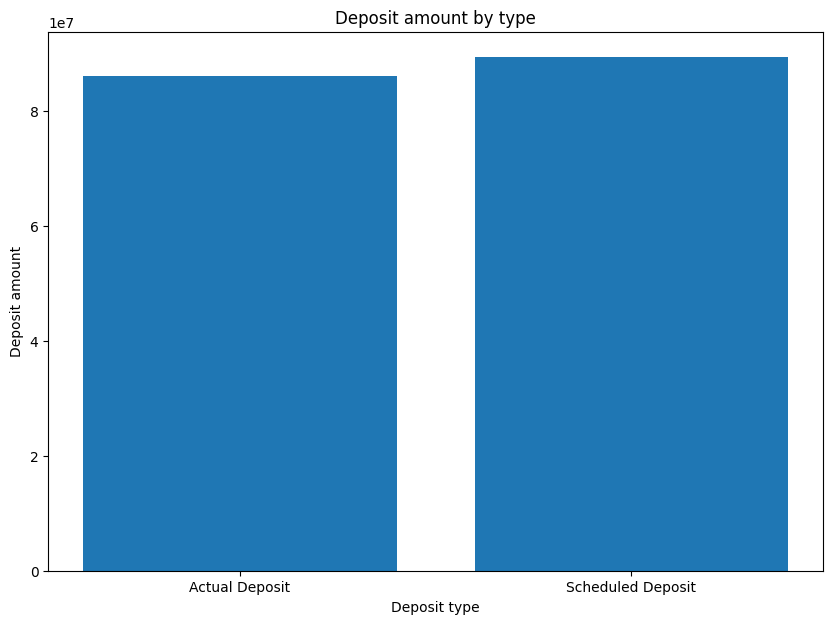

In [ ]:
deposit_amount_by_type = df.groupby(by=df["deposit_type"])["deposit_amount"].sum()

# plots the line
_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount by type")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit type")

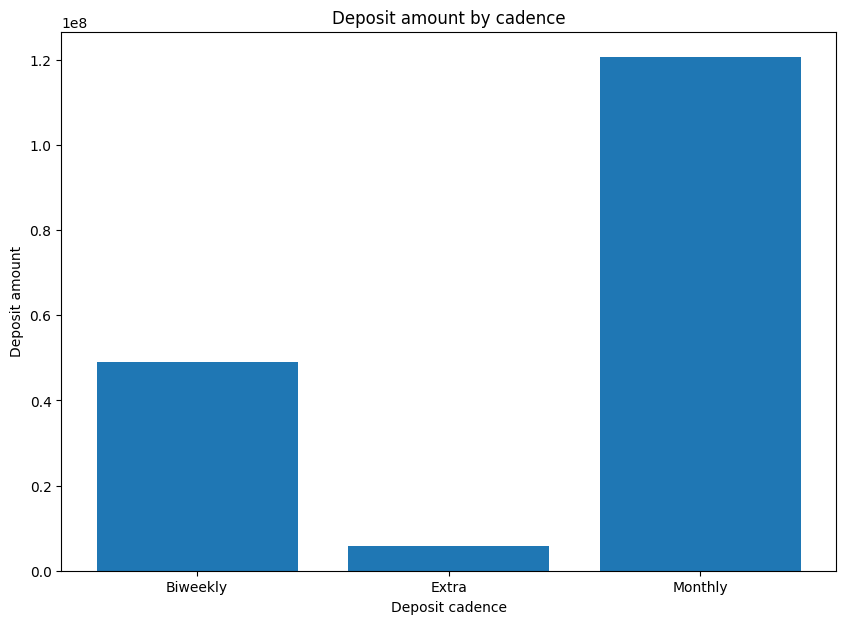

In [ ]:
deposit_amount_by_cadence = df.groupby(by=df["deposit_cadence"])["deposit_amount"].sum()

# plots the line
_ = plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount by cadence")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit cadence")

We can drill down even further, by aggregating by multiple columns and showing even more advanced insights. Let's for example, plot the deposit amount per cadence and through time.

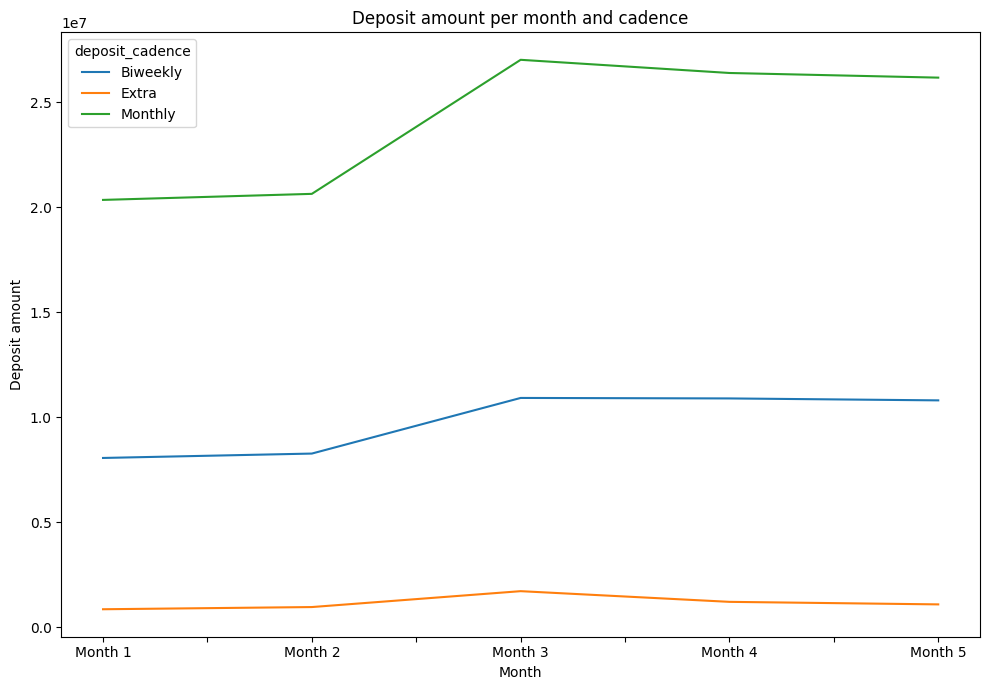

In [ ]:
tmp_df = df.groupby(by=[df["deposit_cadence"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

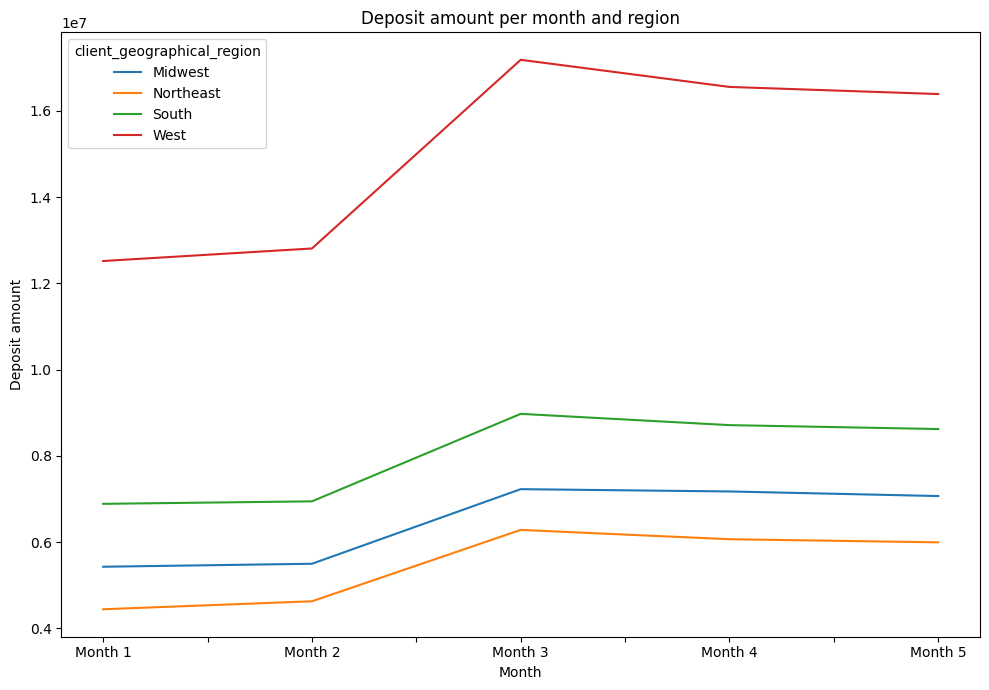

In [ ]:
tmp_df = df.groupby(by=[df["client_geographical_region"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

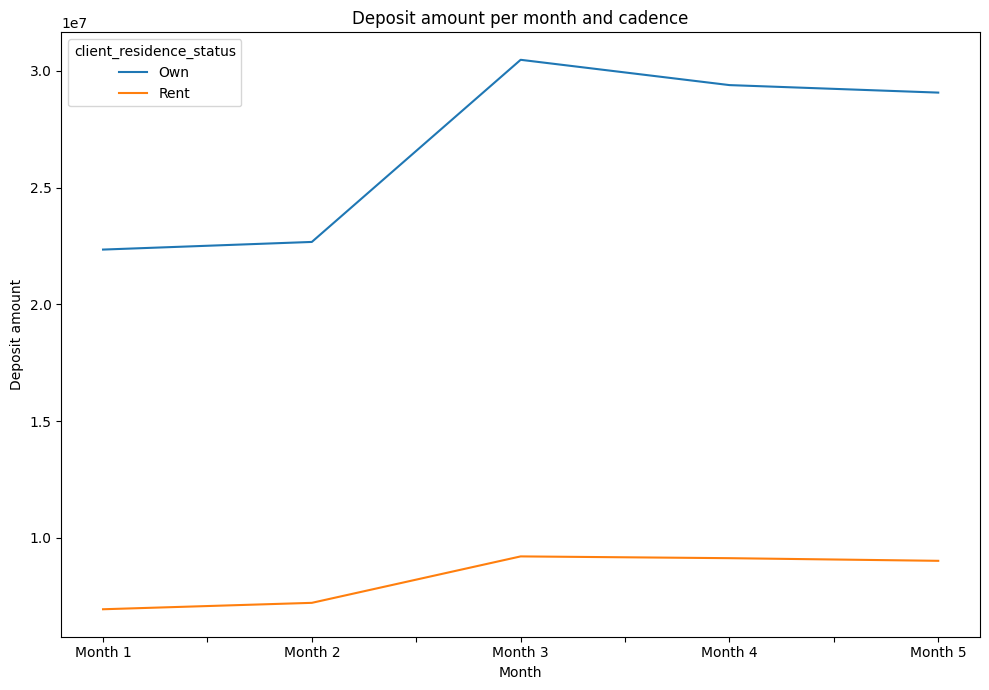

In [ ]:
tmp_df = df.groupby(by=[df["client_residence_status"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

# **Question 1**

Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

This question can already be answered from the plots in the previous sections, especially the ones that show the deposit amount per month. We know that the ad campaign was running during the 3rd month of our data set (which is Month 8 in the current year, i.e., August). A huge spike can be noticed in the line plot titled "Deposit amount per month" between months 7 & 8, i.e., while the campaign was running. Since then, the deposit amount has been slowly decreasing but has remained at very higher levels than before the campaign. To put this into numbers:

During the month the campaign was running, Freedom Debt Relief received almost $10 million dollars increase in deposit amounts than previous months

In the months following the campaign, the total deposit amount starts to slowly decrease, but is still at higher levels than before the ad campaign: $8.5 million in the month immediately following the campaign, and $8 million in the last month of the data

The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of $26.5 million. A quick Google search for "freedom debt relief pricing" reveals an 18-25% fee incurred by the company for its services. We would assume that this is based on the residence status and the deposit cadence, but neither the data nor the task description provide any estimate or hint to this. Assuming the lowest, 18% fee for all clients, we observe an increase in profits to $4.77 million (26.5M * 18%). While this looks like a loss of $230K for the campaign, it is important to note that the trend shows this would have been much higher without the campaign, and it is very unlikely that the minimum fee is applied to all clients, so this number should be treated as the most pessimistic estimate.

Another quantitative assessment that we can make is to see the number of new clients that were brought in during and after the market campaign. We can work with Python's set methods to achieve this.

In [ ]:
# clients that have made any deposit in the first two months
clients_before_campaign = df[(df["month_name"] == "Month 1")
                           | (df["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [ ]:
# clients that have made any deposit in the third month
clients_during_campaign = df[(df["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [ ]:
# clients that have made any deposit after the campaign
clients_after_campaign = df[(df["month_name"] == "Month 4")
                          | (df["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

Question: How many new clients were acquired while the ad campaign was running?

A new client is one that has made his first deposit while the campaign was running.

*This is not necessarily correct, i.e., a client could have made deposits in the past, but since we do not have data for it we will assume that he hasn't made any.

In [ ]:
# convert arrays to sets, and find their difference
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

**Question:** How many after the campaign?

In [ ]:
len(
    set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))
)

752

Another interesting insight that we can calculate is to see how the number of scheduled and actual deposits changes over time. We would expect both numbers to be rising to higher levels during and after the campaign.

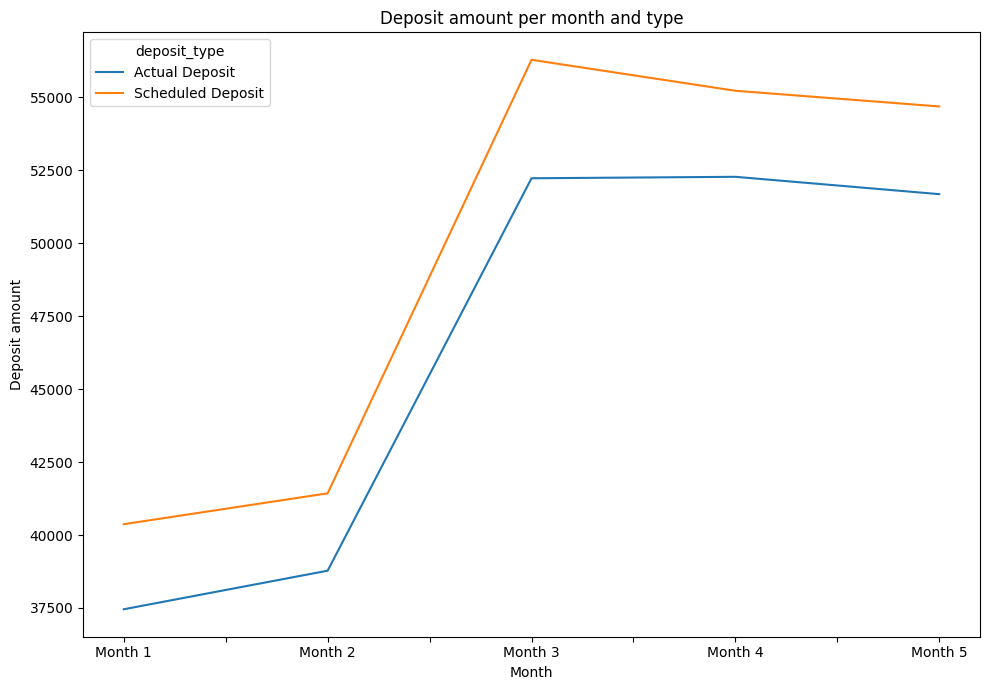

In [ ]:
temp_df = df.groupby(by=[df["deposit_type"], df["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

As expected, this plot very closely matches the distributions of the plots in the analysis section. During the ad campaign, the number of actual and scheduled deposits increases by 25%, or 10K transactions, and while it gradually decreases in the next two months, it remains very high, at above 50K deposits per type each, while the pre-campaign levels were at around 40K.

# **Question 2**

Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

Almost all of the plots show similar patterns through time and it is difficult to make any suggestions.

One thing that could be explored more is targeted marketing. We notice that most of the people in the data are middle-aged (40-60 years) and most of them are homeowners. We can observe this in the age histogram and the count per residence status in the EDA section.

In the next plot, we will show the deposit amount changing through time and age group. We will use the apply method to create groups of customers based on their age: we will simply divide their age by 10. The lower the group, the younger the customer is.

In [ ]:
def discretize_age(row):
    """
    This function gets applied for each row and returns
    the age group {age / 10} for each customer.
    """
    return int(row.client_age / 10)

dff = df.copy(deep=True)
dff["age_group"] = dff.apply(discretize_age, axis=1)
dff

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19,Month 5,8
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26,Month 3,8
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01,Month 3,8
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01,Month 4,8
...,...,...,...,...,...,...,...,...,...,...
480389,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-04,Month 4,8
480390,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480391,137024861084246,West,Own,80,Scheduled Deposit,247.0,Biweekly,2019-09-18,Month 4,8
480392,137024861084246,West,Own,80,Actual Deposit,247.0,Biweekly,2019-10-06,Month 5,8


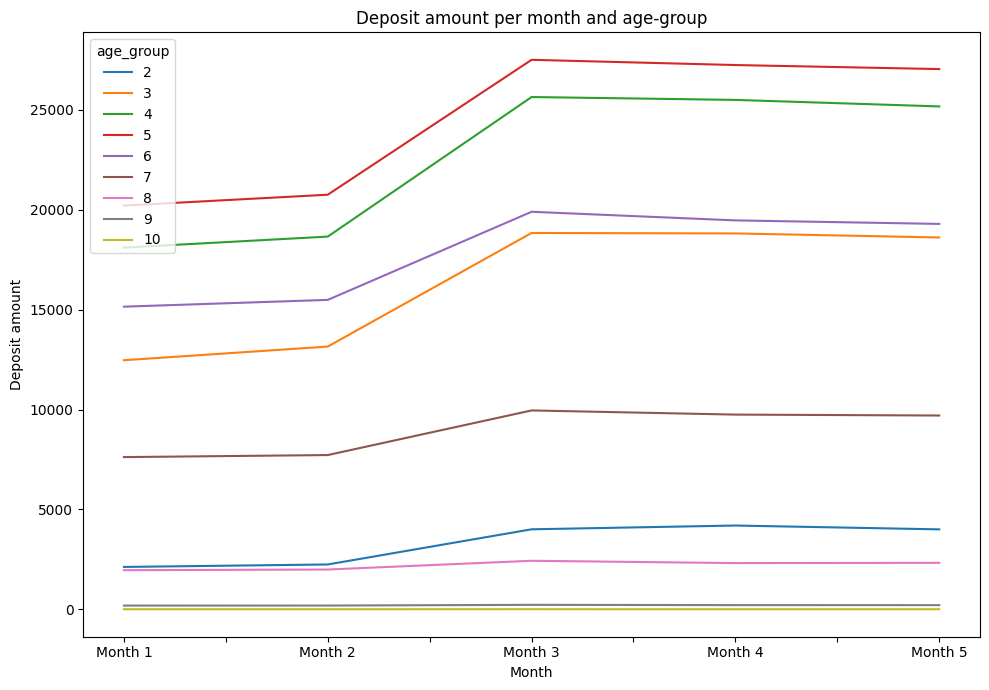

In [ ]:
tmp_df = dff.groupby(by=[dff["age_group"], dff["month_name"]]).size()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and age-group")
plt.tight_layout()

We observe a big increase in middle-aged customers and little to no increase in very young or very old customers. Their low count probably accounts for that. In the following analysis, we focus on the middle-aged sub-group of customers. We think that better engagement with them could result in more deposits.

In [ ]:
df_q2 = df[(df["client_residence_status"] == "Own")
         & (df["client_age"] <= 60)
         & (df["client_age"] >= 40)]
df_q2.shape

(181068, 9)

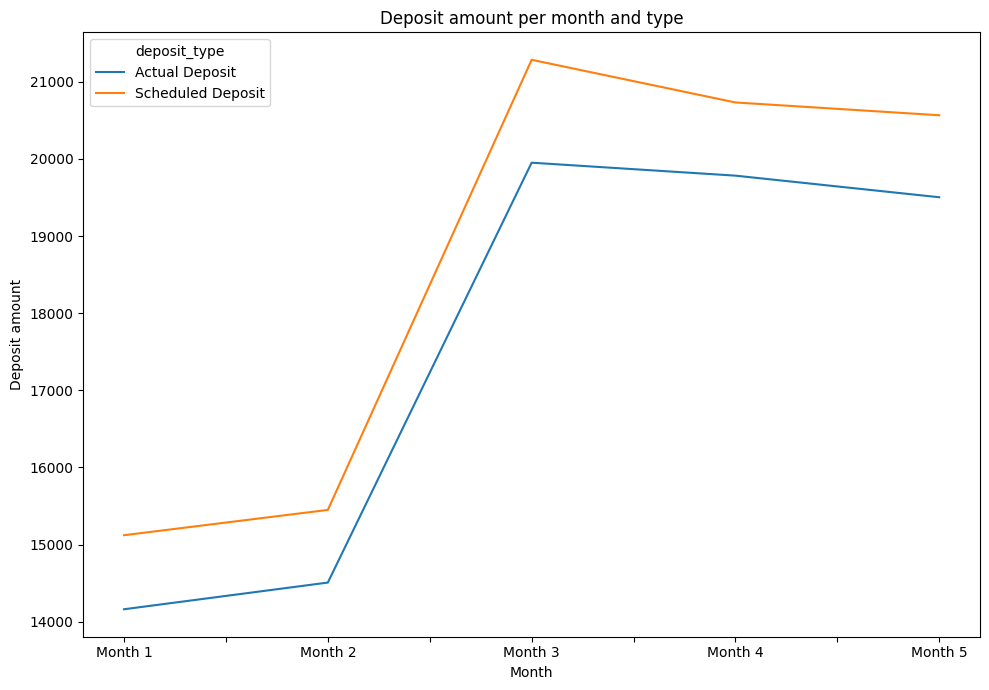

In [ ]:
temp_df = df_q2.groupby(by=[df_q2["deposit_type"], df_q2["month_name"]])["deposit_type"].count()

ax = temp_df.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

This sub-group of customers is responsible for 42% of the extra deposit amount, and yet represents only 37% of clients.

In [ ]:
extra_deposit_df_q2 = df_q2[df_q2["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
extra_deposit_df = df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()

extra_deposit_df_q2 / extra_deposit_df

np.float64(0.4234867523021418)

In [ ]:
df_q2.shape[0] / df.shape[0]

0.3769156150992727

We can further explore the extra deposits to identify client groups that are of interest.

In [ ]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

,count
client_geographical_region,
West,3570
South,1991
Midwest,1486
Northeast,1300


In [ ]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

,count
client_residence_status,
Own,5856
Rent,2491


In [ ]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

,count
month_name,
Month 3,2235
Month 4,1898
Month 5,1846
Month 2,1274
Month 1,1094


Some key points based on the previous cells:

Most extra deposits are observed in the West region as expected. This distribution closely matches the distribution of other deposit types as well
Clients who own their residence are approx. 2.33 times as likely to deposit an extra amount than clients who rent their residence
Most extra deposits are observed in Month 3 when the campaign was running. Post-campaign numbers for extra deposits are 33% higher than pre-campaign.

# **Question 3**

How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

One way we can simulate the postponement of the campaign is to "postpone" the deposits coming from new clients who were acquired during the third month. We (strongly) assume that the clients who made their first deposit in the third month in the data set are acquired due to the campaign; this is not necessarily correct, but for the sake of the exercise we can treat it as if it were.

Technically speaking, this means we should take the following steps.

Identify which clients made their first deposit in the third month, i.e., were acquired because of the campaign. (we have already done that in previous sections)
Postpone their deposits until after the fifth month, i.e., add exactly three months to the date of their deposit.
Re-run the same analyses from Question 1 and make summarise the difference in the results.

In [ ]:
# we make a copy of the deposit data to be able to simulate the postponement
# without messing up the original data set
df_copy = df.copy(deep=True)

In [ ]:
# a set of client_id's that are considered 'new',
# i.e., were acquired during the campaign was running
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))

In [ ]:
import datetime

def simulate_campaign_postponement(row):
    """
    Adds three months to the date of the deposit if the client is new, in two steps:

    1. Transform the deposit date to type datetime and add 90 days to it
    2. Manually handle the month name; add three to it

    """
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

# axis=1 applies the function we provide row-wise, axis=0 does it column-wise
df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

In [ ]:
df_copy["deposit_date"].max()

Timestamp('2020-01-29 00:00:00')

We can now plot the same graphics as in the introductory EDA section.

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


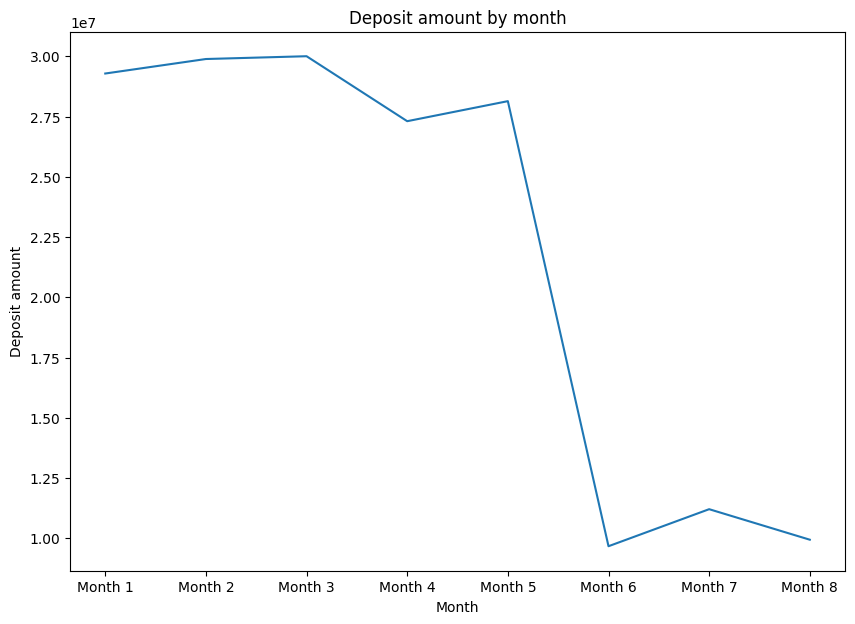

In [ ]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)
# plots the line
_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The plots look a bit weird, because in months 6, 7, and 8 we have only the data coming from the new customers, and this is going to be much lower than usual.

To simulate the deposits coming from the existing customers, we can simply add an average deposit amount from the previous months.

In [ ]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()
avg_monthly_deposit

np.float64(21930414.27375)

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


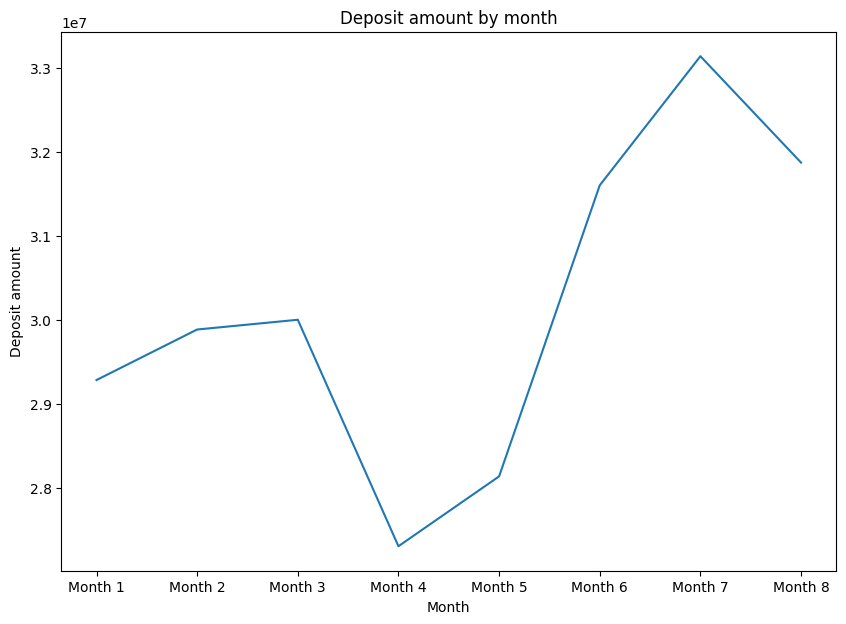

In [ ]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

# add the average monthly deposit estimate to the simulated months
deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)

# plots the line
_ = plt.plot(deposit_amount_by_month)
# set labels to the x and y axis and a plot title
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The simulation shows quite an increase in deposits. Following are some key points to summarise the difference from the answer provided in Question 1.

During the month the campaign was running, Freedom Debt Relief received almost $2.5 million increase in deposit amounts than previous months, compared to $10 million in Question 1.

In the month following the campaign, the total deposit amount continues to increase to reach its maximum at $33 million. In the last month, it drops to $31 million but remains on a higher level than pre-campaign.

The cost of the campaign was $5 million, and the incurred deposit amount increased by a total of $8 million. In Question 1 this number was much higher: $26 million, and we determined that that was borderline profitable. So, $8 million is much lower, and we conclude that postponing the campaign would have not been the right choice.